In [23]:
%matplotlib notebook
%pylab
%matplotlib inline

import pandas as pd
import glob
from matplotlib.lines import Line2D

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/bsuhome/bkyanjo/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
def read_gauge_data(gauge_file):
    """
    Read gauge data from a guage file.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(2,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    levels = data1[:,0]
    time = data1[:,1]
    h = data1[:,2]
    hu = data1[:,3]
    hv = data1[:,4]
    eta = data1[:,5]

    eta_max = max(eta)
    topo = eta - h

    return time, h,eta,topo


def read_valid(gauge_file):
    """
    Read gauge data from a literature data.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(1,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    guage = data1[:,0]
    z = data1[:,1]
    h_max = data1[:,2]
    eta_max = data1[:,3]

    return h_max, eta_max

In [3]:
time,h,eta, topo = read_gauge_data("gauge00000.txt")
# print time, h, eta, topo
print('time =  ', time/3600)
print('h = ', h)
print('eta = ', eta)
# print('topo = ', topo)

time =   [ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.     1.125
  1.25   1.375  1.5    1.625  1.75   1.875  2.     2.125  2.25   2.375
  2.5    2.625  2.75   2.875  3.     3.125  3.25   3.375  3.5    3.625
  3.75   3.875  4.     4.125  4.25   4.375  4.5    4.625  4.75   4.875
  5.     5.125  5.25   5.375  5.5    5.625  5.75   5.875  6.     6.125
  6.25   6.375  6.5    6.625  6.75   6.875  7.     7.125  7.25   7.375
  7.5    7.625  7.75   7.875  8.     8.125  8.25   8.375  8.5    8.625
  8.75   8.875  9.     9.125  9.25   9.375  9.5    9.625  9.75   9.875
 10.    10.125 10.25  10.375 10.5   10.625 10.75  10.875 11.    11.125
 11.25  11.375 11.5   11.625 11.75  11.875 12.    12.125 12.25  12.375
 12.5   12.625 12.75  12.875 13.    13.125 13.25  13.375 13.5   13.625
 13.75  13.875 14.    14.125 14.25  14.375 14.5   14.625 14.75  14.875
 15.    15.125 15.25  15.375 15.5   15.625 15.75  15.875 16.    16.125
 16.25  16.375 16.5   16.625 16.75  16.875 17.    17.125 17.25  17.3

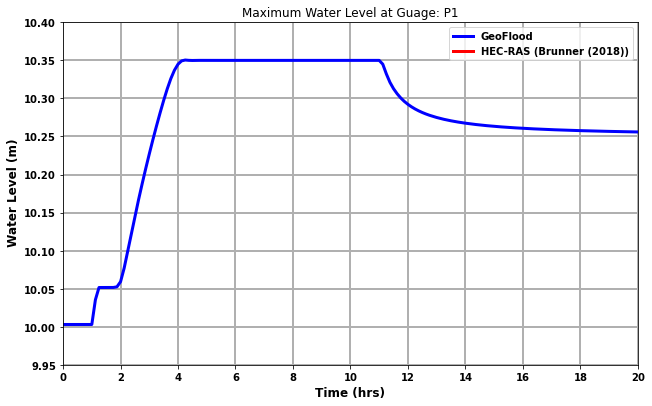

In [36]:

time,h,eta, topo = read_gauge_data("gauge00000.txt")
# plot the data
figsize(10.30, 6.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(5)
plot(time/3600,eta,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

# put letters on the x axis
# xticks(range(len(guages_eta_max)),gauge_points)
axis([0, 20, 9.95, 10.40])
# legend(loc='upper right')
# access legend objects automatically created from data

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel(' Water Level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (hrs)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
#  show a legend without plotting anything

time_n = arange(0,22,2)
pstr = ([f'{N:d}' for N in time_n])
xticks(time_n,pstr)
#  show the last point on the x axis
y_n = arange(9.95,10.45,0.05)
pstr = ([f'{N:.2f}' for N in y_n])
yticks(y_n,pstr)
# rotate the x axis labels
# xticks(rotation=270)
# bold x and ylabels
rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
title('Maximum Water Level at Guage: P1')
grid(linewidth=2)
show()

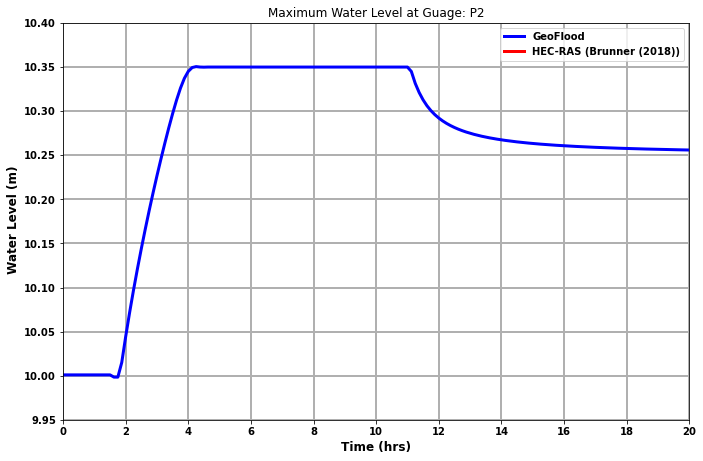

In [42]:

time,h,eta, topo = read_gauge_data("gauge00001.txt")
# plot the data
figsize(11.22, 7.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(6)
plot(time/3600,eta,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

# put letters on the x axis
# xticks(range(len(guages_eta_max)),gauge_points)
axis([0, 20, 9.95, 10.40])
# legend(loc='upper right')
# access legend objects automatically created from data

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel(' Water Level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (hrs)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
#  show a legend without plotting anything

time_n = arange(0,22,2)
pstr = ([f'{N:d}' for N in time_n])
xticks(time_n,pstr)
#  show the last point on the x axis
y_n = arange(9.95,10.45,0.05)
pstr = ([f'{N:.2f}' for N in y_n])
yticks(y_n,pstr)
# rotate the x axis labels
# xticks(rotation=270)
# bold x and ylabels
rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
title('Maximum Water Level at Guage: P2')
grid(linewidth=2)
show()